**The dataset was provided by the UCI Machine Learning Repository.** 

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv(r'Absenteeism_at_work.csv', sep = '\;', engine='python')

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
df.shape

(740, 21)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


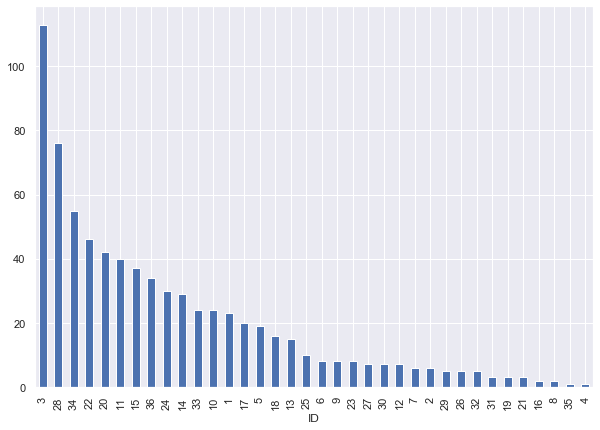

In [6]:
plt.figure(figsize = (10, 7))
df.groupby('ID').size().sort_values(ascending = False).plot(kind = 'bar')

In [7]:
df['ID'].value_counts(normalize = True)*100

3     15.270270
28    10.270270
34     7.432432
22     6.216216
20     5.675676
11     5.405405
15     5.000000
36     4.594595
24     4.054054
14     3.918919
33     3.243243
10     3.243243
1      3.108108
17     2.702703
5      2.567568
18     2.162162
13     2.027027
25     1.351351
6      1.081081
9      1.081081
23     1.081081
27     0.945946
30     0.945946
12     0.945946
7      0.810811
2      0.810811
29     0.675676
26     0.675676
32     0.675676
31     0.405405
19     0.405405
21     0.405405
16     0.270270
8      0.270270
35     0.135135
4      0.135135
Name: ID, dtype: float64

**We can see that 6 employees out of 36 (which is 17% of employees) account for 50% of all absences.**

### There is only one non-medical reason for absence - the 26th one. Let's create a column that will show if an employee had medical condition or not and have a look how often the absenteeism reason is not medical

In [8]:
df['Absence_med'] = df['Reason for absence'].apply(lambda i: 0 if i == 26 else 1)

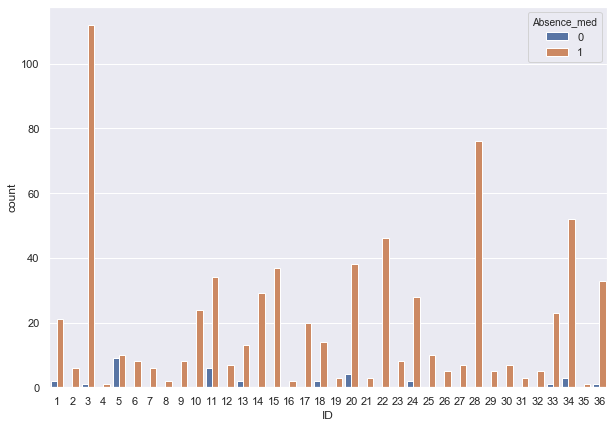

In [9]:
plt.figure(figsize = (10, 7))
sns.countplot(x = 'ID', hue = 'Absence_med', data = df)

So, most of the time the absence was explained by some medical condition.

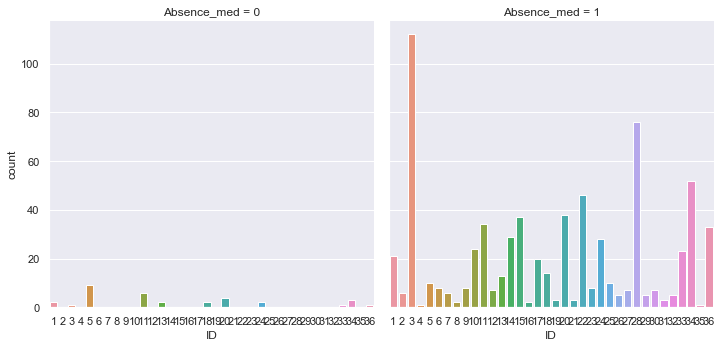

In [10]:
sns.catplot(x = 'ID', col = 'Absence_med', data = df, kind = 'count')

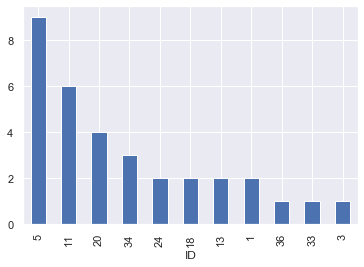

In [11]:
df[df['Absence_med'] == 0].groupby('ID').size().sort_values(ascending = False).plot(kind = 'bar')

In [12]:
pd.crosstab(df.Absence_med, df.Son)

Son,0,1,2,3,4
Absence_med,,,,,
0,8,12,7,2,4
1,290,217,149,13,38


In [13]:
pd.crosstab(df.Absence_med, df.Son, normalize = True)*100

Son,0,1,2,3,4
Absence_med,,,,,
0,1.081081,1.621622,0.945946,0.270270,0.540541
1,39.189189,29.324324,20.135135,1.756757,5.135135


According to the above table we can see that employees with kids had more frequent non-medical reasons for absence. Although employees without kids have the highest number of absence. 

In [14]:
pd.crosstab(df.Absence_med, df.Pet, normalize = True)*100

Pet,0,1,2,4,5,8
Absence_med,,,,,,
0,3.243243,1.216216,0.000000,0.000000,0.000000,0.000000
1,58.918919,17.432432,12.972973,4.324324,0.810811,1.081081


Seems like employees with pets are more responsible and healthy :)

### Medical studies show that people with BMI above or below the normal one are less healthy. The normal BMI varies between 18,5 and 25 point. Let's have a look at BMI of employees

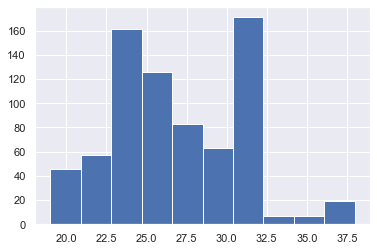

In [15]:
df['Body mass index'].hist()

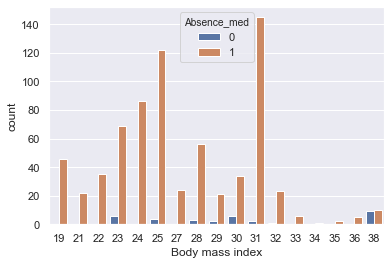

In [16]:
sns.countplot(df['Body mass index'], hue = df.Absence_med)

People with BMI of 31 are the leaders of absenteeism for medical reasons. Let's have a look at those reasons

In [17]:
pd.crosstab(df[df['Body mass index'] == 31]['Body mass index'], df[df['Body mass index'] == 31]['Reason for absence']).T

Body mass index,31
Reason for absence,
0,7
1,1
5,2
6,1
10,2
11,7
12,1
13,16
14,2


The most frequent reason are 27, 23, and 28 which are physiotherapy, medical consultation, and dental consultation respectively. However we can also see that those reasons are te most frequent among all employees

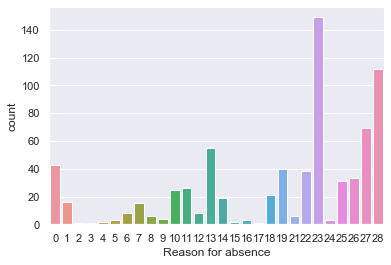

In [18]:
sns.countplot(df['Reason for absence'])